<a href="https://colab.research.google.com/github/Arush0113/EEG_Pipeline-IITR/blob/main/Sequential_Modelling_CateCrossEnt_lossMode_EEG_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing import image
# from sklearn.model_selection import train_test_split

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


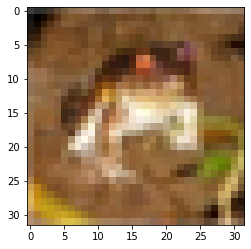

In [ ]:
plt.imshow(train_images[0])
train_images[0].shape
train_images, test_images = train_images/255., test_images/255.

In [ ]:
train_labels[0]

array([6], dtype=uint8)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# import json

# with open('/content/gdrive/MyDrive/cifar100_fine_labels.json', 'r') as fine_labels:
#     cifar100_fine_labels = json.load(fine_labels)

In [ ]:
# len(cifar10_fine_labels)

# Modelling

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Input, Flatten

In [ ]:
num_classes = 10

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)
train_labels[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
def get_generator(features, labels, batch_size = 1):
  for n in range(features.shape[0]//batch_size):
    yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])

In [ ]:
def get_cyclic_generator(features, labels, batch_size = 1):
  while True:
    for n in range(features.shape[0]//batch_size):
      yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])
    permuted = np.random.permutation(len(features))
    features = features[permuted]
    labels = labels[permuted]

In [ ]:
train_batch_size = 100
# train_generator = get_generator(train_images, train_labels, batch_size = train_batch_size)
train_cyclic_generator = get_cyclic_generator(train_images, train_labels, batch_size = train_batch_size)

In [ ]:
images, labels = next(train_generator)

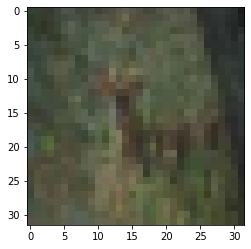

In [ ]:
images, labels = next(train_generator)
image_unbatched = images[0,:,:,:]
plt.imshow(image_unbatched)

## Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def func_monochrome(x):
  def func_bw(a):
    average_pixel = np.mean(a)
    return [average_pixel, average_pixel, average_pixel]
  x = np.apply_along_axis(func_bw, -1, x)
  return x

In [ ]:
data_generator = ImageDataGenerator(
    preprocessing_function = func_monochrome,
    rotation_range = 180,
    rescale = (1/255.0),
    horizontal_flip = False,
    vertical_flip = False,
)

data_generator.fit(train_images)

In [ ]:
data_generator_iterable = data_generator.flow(train_images, train_labels, batch_size = 10, shuffle = False)

In [ ]:
# def get_sequential_model():

#   model = tf.keras.Sequential()
#   model.add(Input((32,32,3)))
#   # model.add(Conv2D(16, (16, 16), padding='same', activation='relu'))
#   # model.add(MaxPooling2D((8,8)))
#   model.add(Conv2D(16, (16, 16), padding='same', activation='relu'))
#   model.add(MaxPool2D((8,8)))
#   model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
#   model.add(MaxPool2D((4,4)))
#   model.add(Conv2D(4, (4, 4), padding='same', activation='relu'))
#   model.add(Flatten())
#   model.add(Dense(200, activation='relu'))
#   model.add(Dense(100, activation='relu'))
#   model.add(Dense(100, activation='softmax'))

#   return model

def get_sequential_model():

  model = tf.keras.Sequential()
  model.add(Input((32,32,3)))
  model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
  model.add(MaxPool2D((4,4)))
  model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
  model.add(MaxPool2D((2,2)))
  model.add(Conv2D(4, (4, 4), padding='same', activation='relu'))
  model.add(Flatten())
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  return model


# def get_sequential_model():

#   model = tf.keras.Sequential()
#   model.add(Input((32, 32, 3)))
#   model.add(Conv2D(8, (8, 8), padding='same', activation='relu',))
#   model.add(MaxPool2D((4,4)))
#   # model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
#   # model.add(MaxPool2D((2,2)))
#   model.add(Conv2D(4, (4, 4), padding='same', activation='relu'))
#   model.add(Flatten())
#   # model.add(Dense(400, activation='relu'))
#   model.add(Dense(200, activation='relu'))
#   model.add(Dense(100, activation='softmax'))

#   return model;

In [ ]:
model = get_sequential_model()
# model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc', 'val_acc'])
# model.summary()

In [ ]:
optimizer = tf.keras.optimizers.Adam(1e-3)
# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
# train_steps_per_epoch = data_generator_iterable.n // data_generator_iterable.batch_size


# val_steps = val_generator.n // val_generator.batch_size
# print('Train Steps per Epoch: ', train_steps_per_epoch, '\n', 'Validation Steps', val_steps)

In [ ]:
# train_steps_per_epoch = len(train_images) // train_batch_size
# print(train_steps_per_epoch)

# history = model.fit_generator(train_generator, steps_per_epoch=train_steps_per_epoch)
history = model.fit(train_cyclic_generator, steps_per_epoch=50, epochs = 100)

# history = model.fit(train_images, train_labels, epochs = 10)


Epoch 1/100
50/50 [==============================] - 1s 7ms/step - loss: 1.3768 - accuracy: 0.5072
Epoch 2/100
50/50 [==============================] - 0s 6ms/step - loss: 1.3764 - accuracy: 0.4972
Epoch 3/100
50/50 [==============================] - 0s 6ms/step - loss: 1.3924 - accuracy: 0.5036
Epoch 4/100
50/50 [==============================] - 0s 6ms/step - loss: 1.3831 - accuracy: 0.4932
Epoch 5/100
50/50 [==============================] - 0s 6ms/step - loss: 1.3456 - accuracy: 0.5168
Epoch 6/100
50/50 [==============================] - 0s 5ms/step - loss: 1.3839 - accuracy: 0.5026
Epoch 7/100
50/50 [==============================] - 0s 7ms/step - loss: 1.3992 - accuracy: 0.4966
Epoch 8/100
50/50 [==============================] - 0s 6ms/step - loss: 1.3712 - accuracy: 0.5092
Epoch 9/100
50/50 [==============================] - 0s 5ms/step - loss: 1.3810 - accuracy: 0.4976
Epoch 10/100
50/50 [==============================] - 0s 7ms/step - loss: 1.3297 - accuracy: 0.5184
Epoch 11/

In [ ]:
y_0 = model.predict(train_images[0][np.newaxis, ...])
print(np.squeeze(y_0, axis = 0))
# print('\n')
print(train_labels[0])

[5.6810229e-04 1.8113811e-04 2.3642277e-02 7.4524775e-02 1.1384487e-01
 4.9594518e-02 7.2048819e-01 1.6306203e-02 5.8610698e-05 7.9135009e-04]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
